In [1]:
# which excels?

# for each excel
# get the variations block
# copy it at the bottom of the Comparison tExcel
import sys
sys.path.append("../")

In [2]:
from pathlib import Path
import xlwings
from utils import excel

excel_paths = [
    r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\ZQ Austria\Quartiersdaten\PlusenergieExcel_Aichinger_211105.xlsb",
    r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\ZQ Austria\Quartiersdaten\PlusenergieExcel_AmBichl_211105.xlsb",
    r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\ZQ Austria\Quartiersdaten\PlusenergieExcel_Glan_211105.xlsb",
    r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\ZQ Austria\Quartiersdaten\PlusenergieExcel_Gneis_211105.xlsb",
    r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\ZQ Austria\Quartiersdaten\PlusenergieExcel_Graz_211105.xlsb",
    r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\ZQ Austria\Quartiersdaten\PlusenergieExcel_Pilzgasse_211105.xlsb",
]

paths = [Path(ep) for ep in excel_paths]

varianten_file = "Quartiersvergleich211129cleaned.xlsx"

aggregation_excel_path = Path(r"C:\Users\Simon Schneider\Nextcloud\EE\6_Daten\Quartiere",varianten_file)
aggregation_sheet = "PEExcel Import"

In [3]:
# for path in paths:
#     excel.append_variations_to_aggregation_sheet(
#         peexcel_path=path,
#         agg_book_path=aggregation_excel_path,
#         agg_sheet_name=aggregation_sheet,
#         close_after=True
#     )

In [4]:
import pandas as pd
print(aggregation_excel_path)

C:\Users\Simon Schneider\Nextcloud\EE\6_Daten\Quartiere\Quartiersvergleich211129cleaned.xlsx


In [5]:
aggbook = xlwings.Book(aggregation_excel_path)

def varianten(
        book:xlwings.Book,
        aggregation_sheet:str,
        rowstart=2,
        rowstop=242,
        colstop=401
) -> pd.DataFrame:

    vars = book.sheets[aggregation_sheet]
    range = vars[rowstart:rowstop, :colstop]
    df = range.options(pd.DataFrame, index=False).value
    return df

df = varianten(aggbook, aggregation_sheet)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Columns: 401 entries, idx to ende result saving area
dtypes: float64(358), object(43)
memory usage: 748.9+ KB


In [6]:
# find a certain variation from the list

df[
    (df["Variantenname"]=="Alpha - Aktuell") &
    (df["Projekt"]=="Aichinger")
]

,idx,Variantenname,longname,Simulation,Berechnungszeitpunkt,FILE,Projekt,Wohnbau NGF (m²),Büro NGF (m²),Schule NGF (m²),...,Netzstrom,Abwärme,Summe,GFZ,PE-Saldo Zielwert [kWh/m²NGF],PE-Saldo Ziel Real[kWh/m²BGF],PE-Saldo Zielwert Großkraftwerke [kWh/m²NGF],diese zellen sind mit ergbnisverweisen befüllbar,diese zellen sind mit ergbnisverweisen befüllbar,ende result saving area
1,2.0,Alpha - Aktuell,Aichinger 2 Alpha - Aktuell,Doppelsimulation,2021-11-24 15:12:07,latest,Aichinger,123.8,0.0,0.0,...,13.777718,0.0,40.061759,0.234899,121.154503,85.708157,97.91429,0.684,0.830531,None


In [7]:
import numpy as np
from utils.targets import Zielwert, ZQSynergy

GFZ = np.linspace(0.0, 8, 800) #min, max, steps
PEQ_alfa = pd.DataFrame({
    "":np.zeros(len(GFZ)),
    "Zielwert Alpha": Zielwert.ZQSynergy().alpha(GFZ=GFZ),

}, index=GFZ)


Text(0, 0.5, 'PE-Bilanz $[{kWh/m²_{NGF}a}]$')

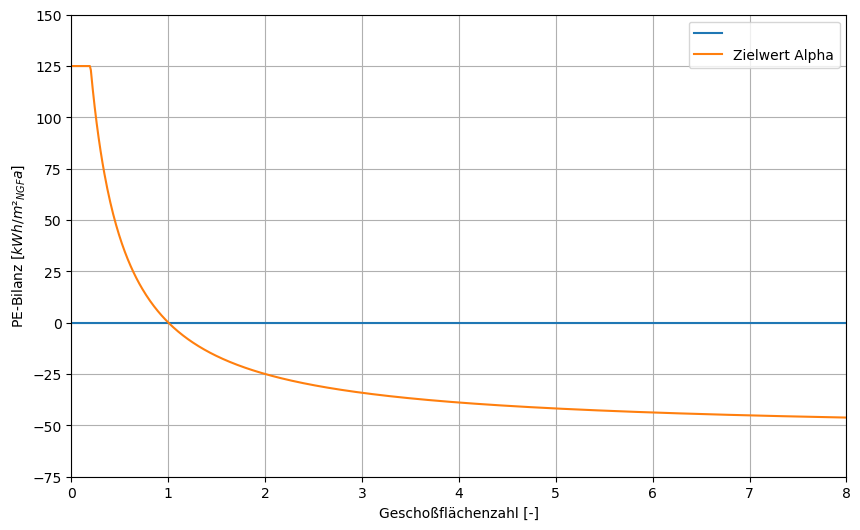

In [8]:
import matplotlib.pyplot as plt
from utils.plotting import target_of_gfz

fig, ax = plt.subplots(1,1, figsize=(10,6))
target_of_gfz(ax=ax, df=PEQ_alfa)
ax.set_ylabel("PE-Bilanz $[{kWh/m²_{NGF}a}]$")



In [9]:
df.dropna(subset=["Variantenname"], inplace=True)
df.drop(df[df.Simulation != "Doppelsimulation"].index, inplace=True)

In [10]:
df.iloc[130]

idx                                                                      2Mob
Variantenname                                                 Alpha - Aktuell
longname                                            Glan 2Mob Alpha - Aktuell
Simulation                                                   Doppelsimulation
Berechnungszeitpunkt                                             44516.437882
                                                              ...            
PE-Saldo Ziel Real[kWh/m²BGF]                                        3.449166
PE-Saldo Zielwert Großkraftwerke [kWh/m²NGF]                        -20.72717
diese zellen sind mit ergbnisverweisen befüllbar                          NaN
diese zellen sind mit ergbnisverweisen befüllbar                          NaN
ende result saving area                                                  None
Name: 189, Length: 401, dtype: object

In [11]:
cols = {
"Alpha - Bauträger Standard": 1.0,
"Alpha - Aktuell": 2.0,
"Alpha - Netzdienlichkeit": 3.0,
"Alpha - Min PEQ": 4.0,
"Alpha - Min PEQ - Nutzerstrom 75%": 4.5,
"Beta - Bauträger Standard": 5.0,
"Beta - Aktuell": 6.0,
"Beta - Netzdienlichkeit": 7.0,
"Beta - Min PEQ": 8.0,
"Beta - Min PEQ - Nutzerstrom 75%": 8.5,
"Omega - Bauträger Standard": 9.0,
"Omega - Aktuell": 10.0,
"Omega - Netzdienlichkeit": 11.0,
"Omega - Min PEQ": 12.0,
"Omega - Min PEQ - Nutzerstrom 75%": 12.5,
}

new_df = df[
    (df.FILE != "None")
]

df = new_df
new_df

,idx,Variantenname,longname,Simulation,Berechnungszeitpunkt,FILE,Projekt,Wohnbau NGF (m²),Büro NGF (m²),Schule NGF (m²),...,Netzstrom,Abwärme,Summe,GFZ,PE-Saldo Zielwert [kWh/m²NGF],PE-Saldo Ziel Real[kWh/m²BGF],PE-Saldo Zielwert Großkraftwerke [kWh/m²NGF],diese zellen sind mit ergbnisverweisen befüllbar,diese zellen sind mit ergbnisverweisen befüllbar,ende result saving area
0,1.0,Alpha - Bauträger Standard,Aichinger 1 Alpha - Bauträger Standard,Doppelsimulation,2021-11-24 15:11:57,latest,Aichinger,123.8,0.0,0.0,...,17.590146,0.0,44.992788,0.234899,121.154503,85.708157,97.91429,0.684,0.916857,None
1,2.0,Alpha - Aktuell,Aichinger 2 Alpha - Aktuell,Doppelsimulation,2021-11-24 15:12:07,latest,Aichinger,123.8,0.0,0.0,...,13.777718,0.0,40.061759,0.234899,121.154503,85.708157,97.91429,0.684,0.830531,None
2,3.0,Alpha - Netzdienlichkeit,Aichinger 3 Alpha - Netzdienlichkeit,Doppelsimulation,2021-11-24 15:12:18,latest,Aichinger,123.8,0.0,0.0,...,6.217158,0.0,39.943547,0.234899,121.154503,85.708157,97.91429,0.684,0.682343,None
3,4.0,Alpha - Min PEQ,Aichinger 4 Alpha - Min PEQ,Doppelsimulation,2021-11-24 15:12:31,latest,Aichinger,123.8,0.0,0.0,...,6.236848,0.0,39.941153,0.234899,121.154503,85.708157,97.91429,0.684,0.682509,None
4,5.0,Beta - Bauträger Standard,Aichinger 5 Beta - Bauträger Standard,Doppelsimulation,2021-11-24 15:12:45,latest,Aichinger,123.8,0.0,0.0,...,18.323453,0.0,49.026591,0.234899,121.154503,85.708157,97.91429,0.684,0.924452,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,9Mob,Omega - Bauträger Standard,Glan 9Mob Omega - Bauträger Standard,Doppelsimulation,44516.439213,latest,Glan,38994.0,0.0,0.0,...,36.239956,0.0,66.783866,1.046626,5.306409,3.449166,-20.72717,NaN,NaN,None
199,10Mob,Omega - Aktuell,Glan 10Mob Omega - Aktuell,Doppelsimulation,44516.439387,latest,Glan,38994.0,0.0,0.0,...,22.198328,0.0,65.459531,1.046626,5.306409,3.449166,-20.72717,NaN,NaN,None
200,11Mob,Omega - Netzdienlichkeit,Glan 11Mob Omega - Netzdienlichkeit,Doppelsimulation,44516.439525,latest,Glan,38994.0,0.0,0.0,...,11.254178,0.0,67.241300,1.046626,5.306409,3.449166,-20.72717,NaN,NaN,None
201,12Mob,Omega - Min PEQ,Glan 12Mob Omega - Min PEQ,Doppelsimulation,44516.439641,latest,Glan,38994.0,0.0,0.0,...,10.296640,0.0,63.527862,1.046626,5.306409,3.449166,-20.72717,NaN,NaN,None


In [12]:
dsm_df = new_df[
    (new_df.index.isin([4.0,4.5]))
]
dsm_df


,idx,Variantenname,longname,Simulation,Berechnungszeitpunkt,FILE,Projekt,Wohnbau NGF (m²),Büro NGF (m²),Schule NGF (m²),...,Netzstrom,Abwärme,Summe,GFZ,PE-Saldo Zielwert [kWh/m²NGF],PE-Saldo Ziel Real[kWh/m²BGF],PE-Saldo Zielwert Großkraftwerke [kWh/m²NGF],diese zellen sind mit ergbnisverweisen befüllbar,diese zellen sind mit ergbnisverweisen befüllbar,ende result saving area
4,5.0,Beta - Bauträger Standard,Aichinger 5 Beta - Bauträger Standard,Doppelsimulation,2021-11-24 15:12:45,latest,Aichinger,123.8,0.0,0.0,...,18.323453,0.0,49.026591,0.234899,121.154503,85.708157,97.91429,0.684,0.924452,None


In [13]:
# get variants
# s2 = aggbook.sheets[4]
# local_addr = s2["M5"].formula.split("!")[1]
# aggsheet = aggbook.sheets[aggregation_sheet]
# new_df.columns[aggsheet[local_addr].column-2]

we commonly need to transform the df into a flat version,
 with an additional column *calc_type*:
 * Erdgas,
 * FW,
 * HP /wo DSM,
 * HP /w DSM


In [14]:
first, last = 2, 241# row
# df_inputs
vars = aggbook.sheets[aggregation_sheet]
range = vars[first:last, :204]
df_inputslarge = range.options(pd.DataFrame, index=False).value
df_gfzblock = vars[first:last, 394:397].options(pd.DataFrame, index=False).value
#joining GFZ shit
df_inputs = df_gfzblock.join(df_inputslarge)
df_inputs

,GFZ,PE-Saldo Zielwert [kWh/m²NGF],PE-Saldo Ziel Real[kWh/m²BGF],idx,Variantenname,longname,Simulation,Berechnungszeitpunkt,FILE,Projekt,...,None,None,None,None,None,None,None,"dont fill, extend instead",None,None
0,0.234899,121.154503,85.708157,1.0,Alpha - Bauträger Standard,Aichinger 1 Alpha - Bauträger Standard,Doppelsimulation,2021-11-24 15:11:57,latest,Aichinger,...,None,None,None,None,None,None,None,None,None,None
1,0.234899,121.154503,85.708157,2.0,Alpha - Aktuell,Aichinger 2 Alpha - Aktuell,Doppelsimulation,2021-11-24 15:12:07,latest,Aichinger,...,None,None,None,None,None,None,None,None,None,None
2,0.234899,121.154503,85.708157,3.0,Alpha - Netzdienlichkeit,Aichinger 3 Alpha - Netzdienlichkeit,Doppelsimulation,2021-11-24 15:12:18,latest,Aichinger,...,None,None,None,None,None,None,None,None,None,None
3,0.234899,121.154503,85.708157,4.0,Alpha - Min PEQ,Aichinger 4 Alpha - Min PEQ,Doppelsimulation,2021-11-24 15:12:31,latest,Aichinger,...,None,None,None,None,None,None,None,None,None,None
4,0.234899,121.154503,85.708157,5.0,Beta - Bauträger Standard,Aichinger 5 Beta - Bauträger Standard,Doppelsimulation,2021-11-24 15:12:45,latest,Aichinger,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,NaN,NaN,NaN,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
234,NaN,NaN,NaN,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
235,0.500000,61.874472,43.771769,None,"Aichinger GFZ 0,5 Alpha - Netzdienlichkeit","Aichinger GFZ 0,5 Alpha - Netzdienlichkeit",None,None,None,Aichinger,...,None,None,None,None,None,None,None,None,None,None
236,0.500000,61.874472,43.771769,None,"Aichinger GFZ 0,5 Beta - Netzdienlichkeit","Aichinger GFZ 0,5 Beta - Netzdienlichkeit",None,None,None,Aichinger,...,None,None,None,None,None,None,None,None,None,None


In [15]:
# df_gas
range = vars[first:last, 204:224]
df_gas = range.options(pd.DataFrame, index=False).value
df_gas["energy_system"] = "Erdgas"
# df_distheat
range = vars[first:last, 224:244]
df_distheat = range.options(pd.DataFrame, index=False).value
df_distheat["energy_system"] = "Fernwärme"
# df_HPwoDSM
range = vars[first:last, 244:264]
df_HPwoDSM = range.options(pd.DataFrame, index=False).value
df_HPwoDSM["energy_system"] = "Wärmepumpe (OHNE DSM)"
# df_HPwDSM
range = vars[first:last, 308:328]
df_HPwDSM = range.options(pd.DataFrame, index=False).value
df_HPwDSM["energy_system"] = "Wärmepumpe (mit DSM)"

In [16]:
# concatenate all dfs
i = np.arange(132)
df1 = pd.concat([df_gas, df_inputs], axis=1)#.set_index([i,i]).reset_index(level=0)
i2 = i+132
df2 = pd.concat([df_distheat, df_inputs], axis=1)#.set_index([i,i2]).reset_index(level=0)
i3 = i2+132
df3 = pd.concat([df_HPwoDSM, df_inputs], axis=1)#.set_index([i,i3]).reset_index(level=0)
i4 = i3+132
df4 = pd.concat([df_HPwDSM, df_inputs ], axis=1)#\
 #   .set_index([i,i4], drop=True)\
#    .reset_index(level=0)

df4.shape

(238, 228)

In [17]:
from enum import Enum, auto
# vars["K2"].value
class EnerSys(Enum):
    gas = auto()
    dh = auto()
    hp_wo_dsm = auto()
    hp_w_dsm = auto()

In [18]:
for n in EnerSys:
    print(n)

EnerSys.gas
EnerSys.dh
EnerSys.hp_wo_dsm
EnerSys.hp_w_dsm


In [19]:

result_map_NGF = {
    EnerSys.gas: {
        "PEBedarf": {"abc": "GW", "num":204},
        "PEExport": {"abc": "GX", "num":205},
        "PESaldo": {"abc": "GY", "num":206},
        "Alpha - Dichteausgleich [kWh/m²NGF]": {
            "abc": "HA", "num":208},
    },
    EnerSys.dh: {
        "PEBedarf": {"abc": "HQ", "num":224},
        "PEExport": {"abc": "HR", "num":225},
        "PESaldo": {"abc": "HS", "num":226},
        "Alpha - Dichteausgleich [kWh/m²NGF]": {
            "abc": "HU", "num":228},
    },
    EnerSys.hp_wo_dsm: {
        "PEBedarf": {"abc": "IK", "num":244},
        "PEExport": {"abc": "IL", "num":245},
        "PESaldo": {"abc": "IM", "num":246},
        "Alpha - Dichteausgleich [kWh/m²NGF]": {
            "abc": "IO", "num":248},
    },
    EnerSys.hp_w_dsm: {
        "PEBedarf": {"abc": "KW", "num":308},
        "PEExport": {"abc": "KX", "num":309},
        "PESaldo": {"abc": "KY", "num":310},
        "Alpha - Dichteausgleich [kWh/m²NGF]": {
            "abc": "LA", "num":312},
    }
}


In [20]:
def address(system:EnerSys, index, col:str, row_offset=3, mapping=result_map_NGF):
    addr = mapping[system][col]["abc"]
    return addr+str(index+row_offset)


In [21]:
aggsheet = vars
a1 = address(EnerSys.hp_wo_dsm, 0, "PEBedarf")
aggsheet[a1].value

'PEBedarf'

In [37]:
df1
df1["PEBedarf"] = - df1["PEBedarf"] 
df1

,PEBedarf,PEExport,PESaldo,Alpha - PE-Saldo ohne Dichteausgleich [kWh/m²NGF],Alpha - Dichteausgleich [kWh/m²NGF],Alpha - PE-Saldo mit Dichteausgleich [kWh/m²NGF],Alpha -PE-Saldo mit Dichteausgleich [kWh/m²BGF],Kontext-Faktor Erneuerbare Großkraftwerte [kWh/m²NGF],Fossile Alltagsmobilität[kWh/m²NGF],PE-Bilanz Beta [kWh/m²NGF],...,None,None,None,None,None,None,None,"dont fill, extend instead",None,None
0,96.172054,88.459705,-7.712349,-7.712349,-121.154503,-128.866852,-91.164093,-23.240213,-45.737471,-151.364110,...,None,None,None,None,None,None,None,None,None,None
1,67.563892,119.696343,52.132450,52.132450,-121.154503,-69.022053,-48.828172,-23.240213,-39.253797,-85.035636,...,None,None,None,None,None,None,None,None,None,None
2,64.866111,156.221696,91.355585,91.355585,-121.154503,-29.798918,-21.080606,-23.240213,-32.770123,-39.328828,...,None,None,None,None,None,None,None,None,None,None
3,64.961369,147.942374,82.981005,82.981005,-121.154503,-38.173498,-27.005023,-23.240213,-32.770123,-47.703407,...,None,None,None,None,None,None,None,None,None,None
4,99.970927,86.275555,-13.695372,-13.695372,-121.154503,-134.849875,-95.396654,-23.240213,-45.737471,-157.347133,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
235,64.542486,189.889012,125.346526,125.346526,-61.874472,63.472055,44.901945,-23.240213,-32.770123,53.942145,...,None,None,None,None,None,None,None,None,None,None
236,70.432301,185.880783,115.448482,115.448482,-61.874472,53.574010,37.899785,-23.240213,-32.770123,44.044100,...,None,None,None,None,None,None,None,None,None,None


Zuerst einmal ein Sanity check:
In welchen Input Kategorien unterscheiden sich die Varianten nicht?

In [38]:
projects = df_inputs.Projekt.unique()
projects

array(['Aichinger', 'Am Bichl', 'Gneis', 'Graz', 'Pilzgasse', None,
       'Glan', 'Graz16'], dtype=object)

In [39]:
varianten = df_inputs.Variantenname.unique()
varianten


array(['Alpha - Bauträger Standard', 'Alpha - Aktuell',
       'Alpha - Netzdienlichkeit', 'Alpha - Min PEQ',
       'Beta - Bauträger Standard', 'Beta - Aktuell',
       'Beta - Netzdienlichkeit', 'Beta - Min PEQ',
       'Omega - Bauträger Standard', 'Omega - Aktuell',
       'Omega - Netzdienlichkeit', 'Omega - Min PEQ',
       'Alpha - Min PEQ - 75% Nutzerstrom',
       'Beta - Min PEQ - 75% Nutzerstrom',
       'Omega - Min PEQ - Nutzerstrom 75%',
       'Beta - Min PEQ - Nutzerstrom 75%',
       'Omega - Min PEQ - 75% Nutzerstrom', 'Alpha - Bauträger',
       'Beta - Bauträger', 'Beta - Akutell', 'Omega - Bauträger',
       'Omega - Akutell',
       'Alpha - Pilzgasse Manfred mit Netzdienlichkeit',
       'Alpha - Pilzgasse Manfred mit Netzdienlichkeit Wind 2017',
       'Alpha - Pilzgasse Manfred mit Netzdienlichkeit Wind 2018',
       'Alpha - Pilzgasse Manfred mit Netzdienlichkeit Wind 2019',
       'Alpha - Pilzgasse Manfred mit Netzdienlichkeit Wind 2020', None,
       'Aich

In [25]:
bauweisen = df_inputs["Gewählte Variante"].unique()
bauweisen, len(bauweisen)

(array(['Bauträger Standard', 'Aktuell', 'Hybridbauweise',
        'Graz Bauträger Standard', 'Graz Aktuelle Planung', 'ZQ2 P33',
        None], dtype=object),
 7)

In [40]:
sonnenschutz = df_inputs["Mobiler Sommerlicher Sonnenschutz"].unique()
sonnenschutz, len(sonnenschutz)


(array([0.58      , 0.6       , 0.96059388, 0.8       ,        nan,
        0.9       ]),
 6)

In [41]:
view2 = df2[df2.idx.isin([1.,5.,9.])].copy()
view3 = df3[df3.idx.isin([2.,6.,10.])].copy()
view4 = df4[df4.idx.isin([3.,4.0,4.5,7.,8.,8.5,11.,12.,12.5])].copy()
view = pd.concat([view2,view3, view4])

In [42]:
view = view[view.FILE != "None"]

In [43]:
aggbook.sheets["Varianten"]["A1"].value     = view

In [48]:
import seaborn as sns

alfa = view[view["Variantenname"].str.contains("Alpha")]
alfa["PEBedarf"] = -alfa["PEBedarf"]

C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_16548\3131556990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alfa["PEBedarf"] = -alfa["PEBedarf"]


<AxesSubplot:xlabel='PEBedarf', ylabel='PEExport'>

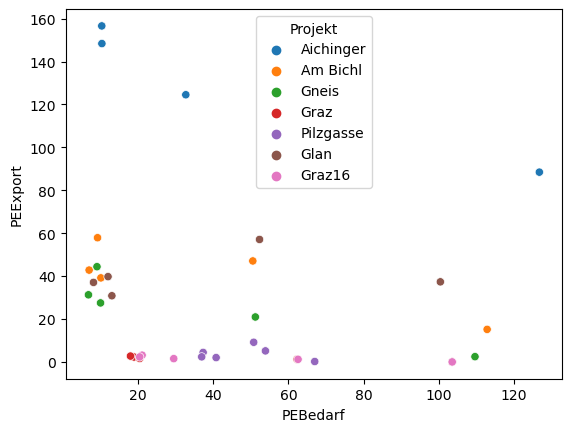

In [49]:
sns.scatterplot(data=alfa,
            x="PEBedarf",
            y="PEExport",
            hue="Projekt")

In [32]:
from utils.targets import target
var = alfa.iloc[0]
# var
peb = var["PEBedarf"]
pee = var["PEExport"]
peb, pee

(-126.79530123469388, 88.4597052992049)

In [33]:
var

PEBedarf                                            -126.795301
PEExport                                              88.459705
PESaldo                                              -38.335596
Alpha - PE-Saldo ohne Dichteausgleich [kWh/m²NGF]    -38.335596
Alpha - Dichteausgleich [kWh/m²NGF]                 -121.154503
                                                        ...    
None                                                       None
None                                                       None
dont fill, extend instead                                  None
None                                                       None
None                                                       None
Name: 0, Length: 228, dtype: object

In [34]:
from utils.targets import Zielwert
za = Zielwert.ZQSynergy().alpha(var["GFZ"])

za

107.13519616390583